In [1]:
from platform import python_version

print(python_version())

3.8.8


In [4]:
import pandas as pd
import numpy as np
import sys

In [56]:
df=pd.read_csv('extruder1407_cleaned_imputation.csv')  

In [57]:
df_features=df.drop(columns=['utctimestamp'])

In [60]:
df_features.to_csv('extruder1407_cleaned_imputation_features.csv', index=False, header=False)

## Ottengo il numero di cluster presumibilmente ideale con la regola del gomito

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

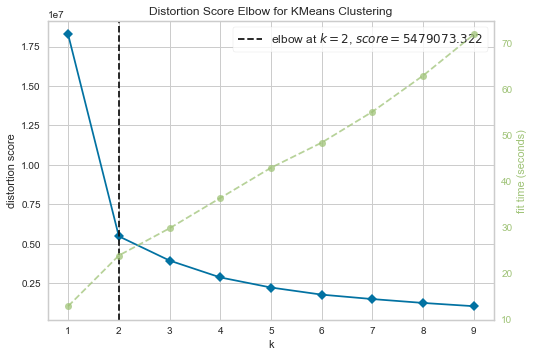

In [61]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df_features)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figu

## Applico l'algoritmo TICC per il clustering prima al dataset intero poi a quello ricampionato

In [62]:
from TICC_solver import TICC


fname = "extruder1407_cleaned_imputation_features.csv"
ticc = TICC(window_size=1, number_of_clusters=5, lambda_parameter=11e-2, beta=600, maxIters=50, threshold=2e-5,
            write_out_file=False, prefix_string="output_folder/", num_proc=1)
(cluster_assignment, cluster_MRFs) = ticc.fit(input_file=fname)

print(cluster_assignment)
np.savetxt('Results_Extruder_w1.txt', cluster_assignment, fmt='%d', delimiter=',')

lam_sparse 0.11
switch_penalty 600
num_cluster 5
num stacked 1
completed getting the data



ITERATION ### 0
OPTIMIZATION for Cluster # 0 DONE!!!
OPTIMIZATION for Cluster # 1 DONE!!!
OPTIMIZATION for Cluster # 2 DONE!!!
OPTIMIZATION for Cluster # 3 DONE!!!
OPTIMIZATION for Cluster # 4 DONE!!!
length of the cluster  0 ------> 462504
length of the cluster  1 ------> 101155
length of the cluster  2 ------> 538123
length of the cluster  3 ------> 213116
length of the cluster  4 ------> 920694
UPDATED THE OLD COVARIANCE
beginning the smoothening ALGORITHM
length of cluster # 0 --------> 466980
length of cluster # 1 --------> 101853
length of cluster # 2 --------> 542180
length of cluster # 3 --------> 194863
length of cluster # 4 --------> 929716
Done writing the figure







ITERATION ### 1
OPTIMIZATION for Cluster # 0 DONE!!!
OPTIMIZATION for Cluster # 1 DONE!!!
OPTIMIZATION for Cluster # 2 DONE!!!
OPTIMIZATION for Cluster # 3 DONE!!!
OPTIMIZATION for Cluster # 4 DONE!!!
length of the cl

In [55]:
df_res=pd.read_csv('extruder1407_cleaned_resample20s.csv')  
df_features_res=df_res.drop(columns=['utctimestamp'])
df_features_res.to_csv('extruder1407_20s_cleaned_features.csv', index=False, header=False)

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

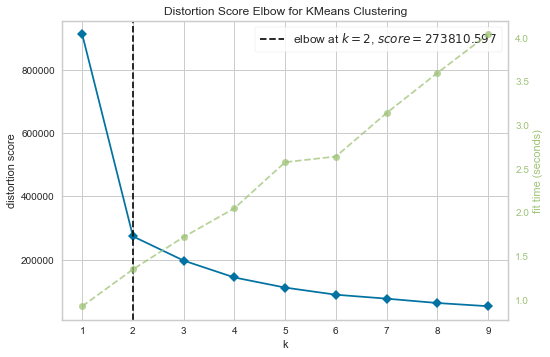

In [44]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df_features_res)        # Fit the data to the visualizer
visualizer.show()    

In [52]:
fname = "extruder1407_20s_cleaned_features.csv"
ticc = TICC(window_size=1, number_of_clusters=5, lambda_parameter=11e-2, beta=600, maxIters=50, threshold=2e-5,
            write_out_file=False, prefix_string="output_folder/", num_proc=1)
(cluster_assignment, cluster_MRFs) = ticc.fit(input_file=fname)

print(cluster_assignment)
np.savetxt('Results_Extruder_w1_20s.txt', cluster_assignment, fmt='%d', delimiter=',')

lam_sparse 0.11
switch_penalty 600
num_cluster 5
num stacked 1
completed getting the data



ITERATION ### 0
OPTIMIZATION for Cluster # 0 DONE!!!
OPTIMIZATION for Cluster # 1 DONE!!!
OPTIMIZATION for Cluster # 2 DONE!!!
OPTIMIZATION for Cluster # 3 DONE!!!
OPTIMIZATION for Cluster # 4 DONE!!!
length of the cluster  0 ------> 48151
length of the cluster  1 ------> 27123
length of the cluster  2 ------> 23479
length of the cluster  3 ------> 8409
length of the cluster  4 ------> 4619
UPDATED THE OLD COVARIANCE
beginning the smoothening ALGORITHM
length of cluster # 0 --------> 48247
length of cluster # 1 --------> 27079
length of cluster # 2 --------> 23381
length of cluster # 3 --------> 8415
length of cluster # 4 --------> 4659
Done writing the figure







ITERATION ### 1
OPTIMIZATION for Cluster # 0 DONE!!!
OPTIMIZATION for Cluster # 1 DONE!!!
OPTIMIZATION for Cluster # 2 DONE!!!
OPTIMIZATION for Cluster # 3 DONE!!!
OPTIMIZATION for Cluster # 4 DONE!!!
length of the cluster  0 -----